## **CIFAR 10**

The dataset consists of 60,000 random images belonging to 10 classes.

The split is : 50,000 Training Images and 10,000 Test Images

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# Importing the dataset
# =============================================================================
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [0]:
# =============================================================================
# Preprocessing the data
# =============================================================================
#Scaling the data
x_train = x_train/255
x_test  = x_test/255
# =============================================================================
# One hot Encoding 
# =============================================================================
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test  = to_categorical(y_test,num_classes=10)

input_shape = (32,32,3)


In [3]:
# =============================================================================
# Creating the model
# =============================================================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import ELU,PReLU
from tensorflow.keras.callbacks import EarlyStopping

# =============================================================================
# ELU
# =============================================================================
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation=ELU(),input_shape = input_shape))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation=ELU(),input_shape = input_shape ))
# model.add(Conv2D(filters=128,kernel_size=(2,2),activation=ELU(),input_shape = input_shape ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(2,2),activation=ELU(),input_shape = input_shape ))
model.add(Conv2D(filters=32,kernel_size=(2,2),activation=ELU(),input_shape = input_shape ))
# model.add(Conv2D(filters=32,kernel_size=(1,1),activation=ELU(),input_shape = input_shape ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
# model.add(Dense(units=128,activation=ELU()))
# model.add(Dropout(0.5))
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
early_stop = EarlyStopping(monitor='val_loss',patience=5)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        8224      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [4]:
# Fitting the model to the training set and then validating it on the test set
model.fit(x=x_train,y=y_cat_train,epochs=70,validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9473 - accuracy: 0.2621 - val_loss: 1.4918 - val_accuracy: 0.4600
Epoch 2/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5738 - accuracy: 0.4264 - val_loss: 1.3568 - val_accuracy: 0.5192
Epoch 3/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4223 - accuracy: 0.4930 - val_loss: 1.2244 - val_accuracy: 0.5834
Epoch 4/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3194 - accuracy: 0.5384 - val_loss: 1.0999 - val_accuracy: 0.6283
Epoch 5/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2524 - accuracy: 0.5698 - val_loss: 1.0517 - val_accuracy: 0.6429
Epoch 6/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1882 - accuracy: 0.5968 - val_loss: 1.0051 - val_accuracy: 0.6640
Epoch 7/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1384 - accuracy: 0.6171 - val_loss: 0.9965 - val_accuracy:

Saving the results after training model.


In [0]:
results = pd.DataFrame(model.history.history)

Looking at the graph we can be sure that the model is not overfitting and it was able to achieve a good convergence with an accuracy of 70% 

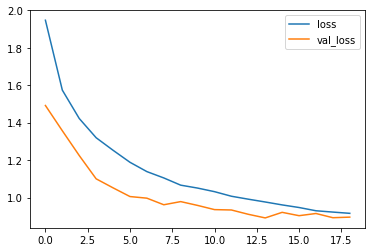

In [6]:
results[['loss','val_loss']].plot()

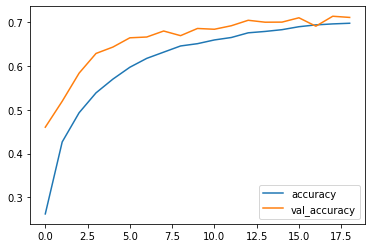

In [7]:
results[['accuracy','val_accuracy']].plot()

Saving the model for making future prediction and not training the model all over again.


In [0]:
model.save('CIFAR_10_CNN.h5')

Making predictions on the test set and saving them along with the true values of the classes for the images in test set.

Both the True class and the Predicted class is stored in a csv file.

In [9]:
y_pred = model.predict_classes(x_test,verbose=1)
true_value = list(y_test)
predict_value = list(y_pred)
comparison = pd.DataFrame({'True Value':true_value,'Predicted Value':predict_value})
comparison.to_csv('Predicted_VS_True_Classes_CIFAR_CNN.h5')


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
313/313 [==============================] - 1s 2ms/step


Using Confusion Matrix to get a better performance overview of the model.

In [0]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred)

In [11]:
print(con_mat)

[[812  12  25  30  16   2   4   6  53  40]
 [ 26 831   1  17   1   4   3   0  20  97]
 [112   4 474  96 128  67  54  38  13  14]
 [ 31  12  57 539  68 149  66  48  11  19]
 [ 33   5  36  72 683  10  33 116   9   3]
 [ 11   4  41 253  48 544  17  70   5   7]
 [  8   3  32  96  46   5 787   7  10   6]
 [ 18   3  23  57  36  53   7 787   3  13]
 [102  24   4  25   4   1   1   6 801  32]
 [ 36  57   3  13   1   1   1  12  29 847]]
